# Calculate and plot a TERS image of pristine MoS$_2$ monolayer

In this example, we use the `periodic-ters` infrastructure to analyze the calculation of the TERS image of the $A_{1}'$ vibration of a free-standing MoS$_2$ monolayer.
See the other examples for additional comments on the structure of the notebook.

In [1]:
from pathlib import Path
import pickle

import numpy as np
import matplotlib.pyplot as plt

import ase.io
import finite_field_ters as ffters

In [2]:
plt.style.use('custom')

## Read in calculation outputs

In [4]:
ters = ffters.analyze_2d_ters(working_dir=Path('./data'), efield=1.0e-1, dq=5e-3, nbins=(11, 11), periodic=True, use_groundstate=False, no_groundstate_dir=Path('./data/no_nearfield'))

In [5]:
ex = np.array([-8.77, 8.77, -7.54, 7.54])

In [6]:
def plot_numbers(matrix, max, nbins, axis):
    for ni, i in enumerate(np.linspace(-max, max, nbins)):
        for nj, j in enumerate(np.linspace(-max, max, nbins)):
            c = matrix.T[ni, nj]
            axis.text(i, j, f'{c:.3f}', va='center', ha='center', fontsize=9)

## Plot induced dipoles as a function of the tip position

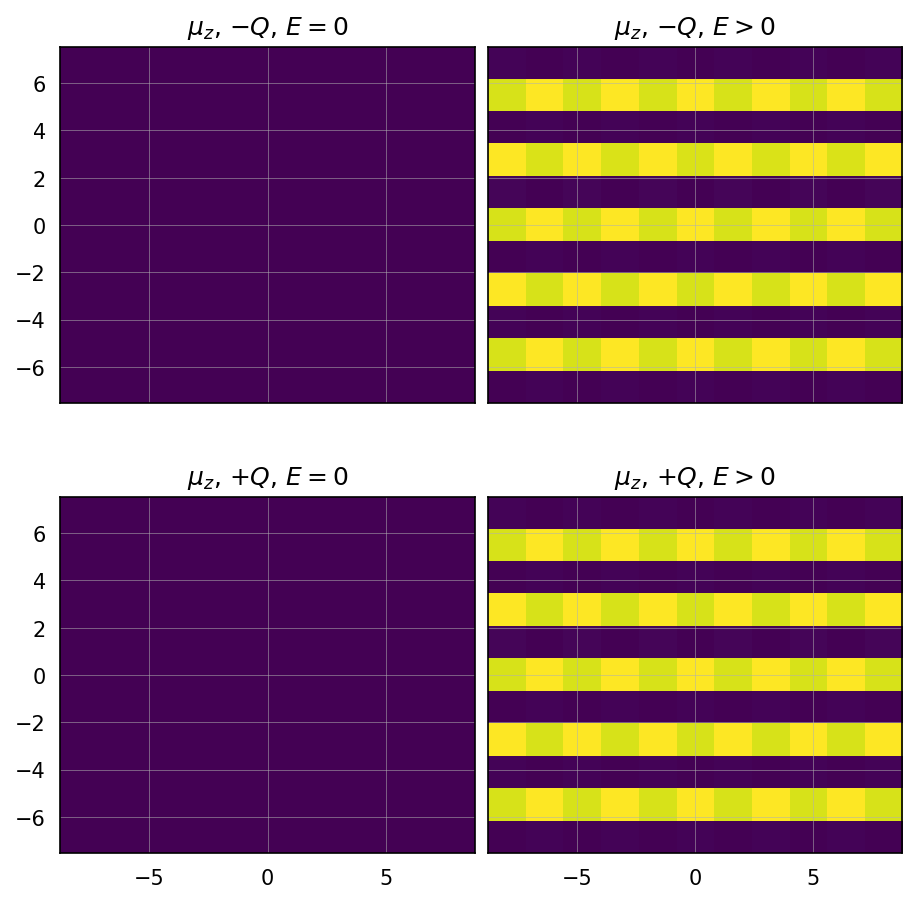

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)
ax[0, 0].imshow(ters['dipole0'][0], extent=ex, origin='lower')
#ax[0, 0].contour(mu_neg_zero.T, extent=ex)
ax[0, 0].set_title(r'$\mu_z$, $-Q$, $E=0$')

ax[0, 1].imshow(ters['dipole'][0], extent=ex, origin='lower')
#ax[0, 1].contour(mu_neg_field.T, extent=ex)
ax[0, 1].set_title(r'$\mu_z$, $-Q$, $E>0$')

ax[1, 0].imshow(ters['dipole0'][1], extent=ex, origin='lower')
#ax[1, 0].contour(mu_pos_zero.T, extent=ex)
ax[1, 0].set_title(r'$\mu_z$, $+Q$, $E=0$')

ax[1, 1].imshow(ters['dipole'][1], extent=ex, origin='lower')
#ax[1, 1].contour(mu_pos_field.T, extent=ex)
ax[1, 1].set_title(r'$\mu_z$, $+Q$, $E>0$')

plt.savefig('dipoles.pdf')

## Plot polarizabilities as a function of the tip position

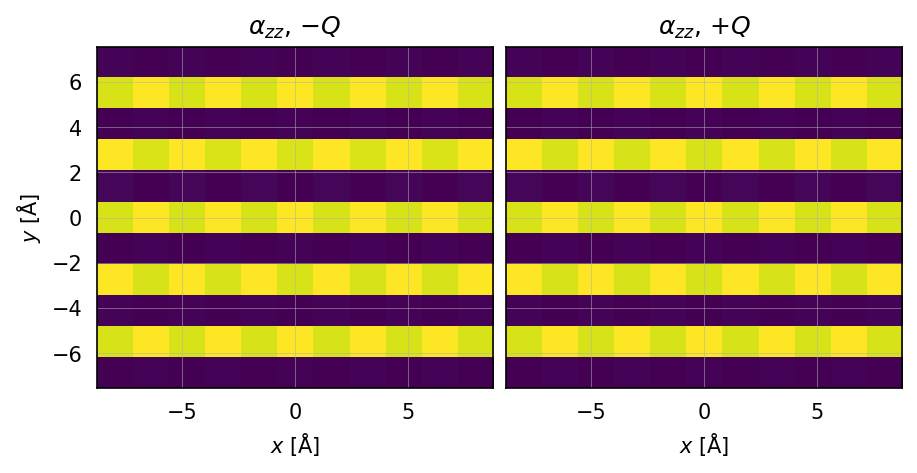

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(6, 3), sharex=True, sharey=True, constrained_layout=True)

ax[0].imshow(ters['alpha'][0], extent=ex, origin='lower')
#ax[0].contour(alpha_neg.T, extent=ex)
ax[0].set_title(r'$\alpha_{zz}$, $-Q$')
ax[1].imshow(ters['alpha'][1], extent=ex, origin='lower')
#ax[1].contour(alpha_pos.T, extent=ex)
ax[1].set_title(r'$\alpha_{zz}$, $+Q$')

ax[0].set_xlabel(r'$x$ [$\mathrm{\AA}$]')
ax[0].set_ylabel(r'$y$ [$\mathrm{\AA}$]')
ax[1].set_xlabel(r'$x$ [$\mathrm{\AA}$]')

plt.savefig('polarizabilities.pdf')

## Plot TERS intensity as a function of the tip position

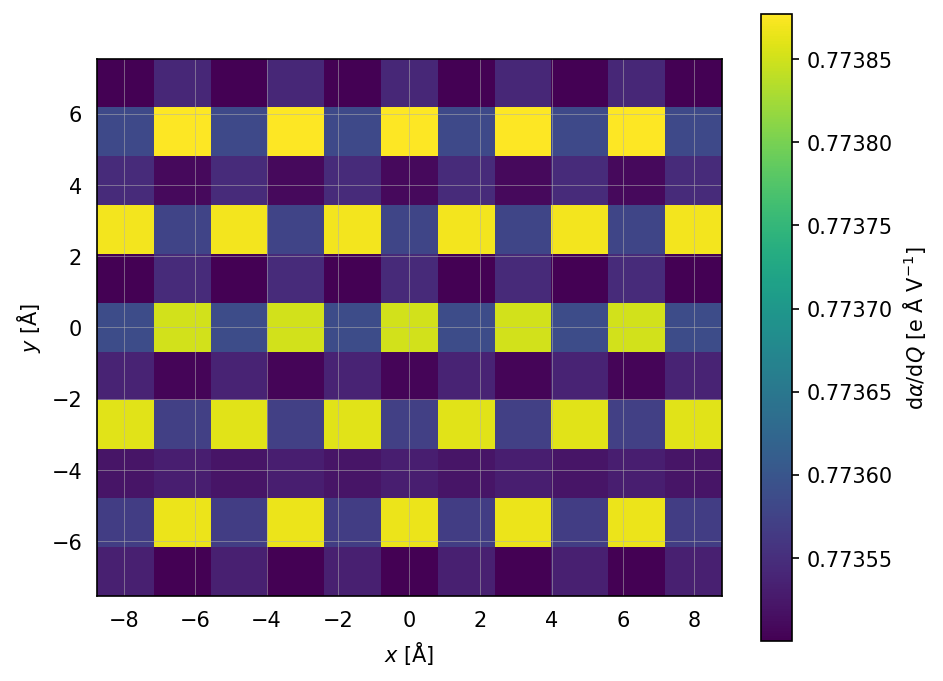

In [18]:
plt.imshow(ters['d(alpha)/dQ'], cmap='viridis', origin='lower', extent=ex)
plt.colorbar(label=r'$\mathrm{d}\alpha / \mathrm{d}Q$ [e $\mathrm{\AA}$ V$^{-1}$]')
plt.xlabel(r'$x$ [$\mathrm{\AA}$]')
plt.ylabel(r'$y$ [$\mathrm{\AA}$]')
plt.tight_layout()
plt.savefig('dalpha-dq.pdf')

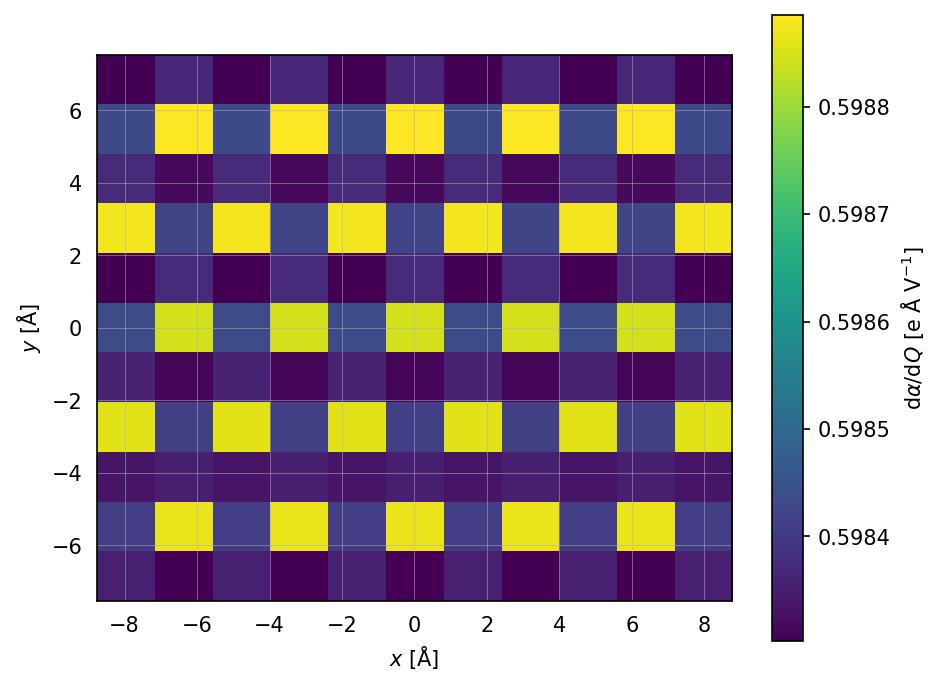

In [19]:
plt.imshow(ters['intensity'], cmap='viridis', origin='lower', extent=ex)
plt.colorbar(label=r'$\mathrm{d}\alpha / \mathrm{d}Q$ [e $\mathrm{\AA}$ V$^{-1}$]')
plt.xlabel(r'$x$ [$\mathrm{\AA}$]')
plt.ylabel(r'$y$ [$\mathrm{\AA}$]')
plt.tight_layout()
plt.savefig('dalpha-dq.pdf')

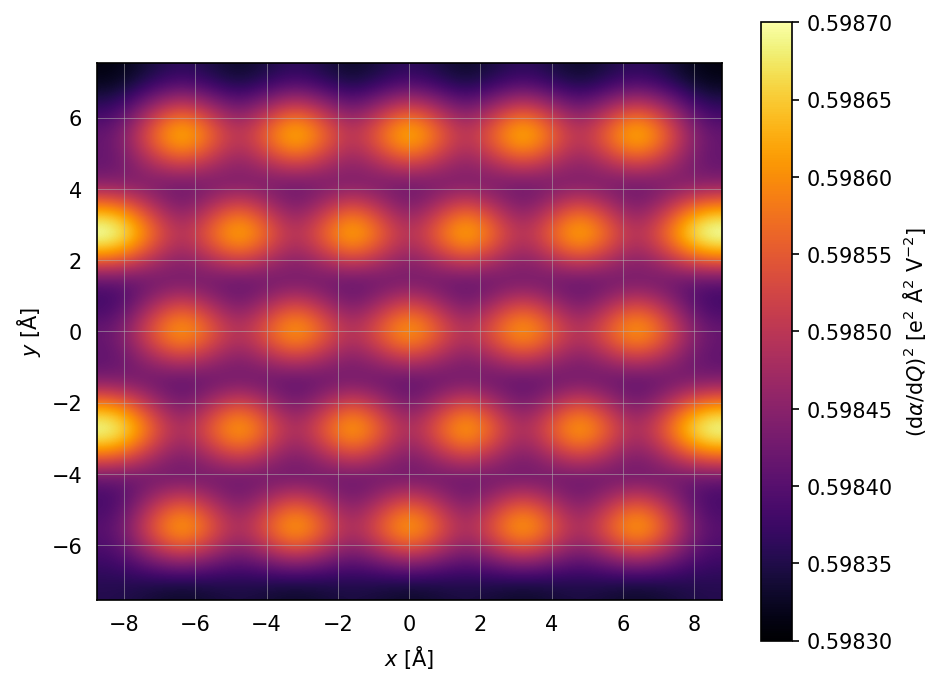

In [14]:
plt.imshow(I, origin='lower', extent=ex, cmap='inferno', interpolation='bicubic', vmin=0.5983, vmax=0.5987)
plt.colorbar(label=r'$(\mathrm{d}\alpha / \mathrm{d}Q)^2$ [e$^2$ $\mathrm{\AA}^2$ V$^{-2}$]')
plt.xlabel(r'$x$ [$\mathrm{\AA}$]')
plt.ylabel(r'$y$ [$\mathrm{\AA}$]')
plt.tight_layout()
plt.savefig('ters.pdf');